In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest
import random

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

In [29]:
CUANTITATIVES = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'OverallQual', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


data = pd.read_csv('train.csv').drop(['Id'], axis = 1)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Análisis de variables a incluír en el modelo

#### Análisis de regresión

<AxesSubplot:>

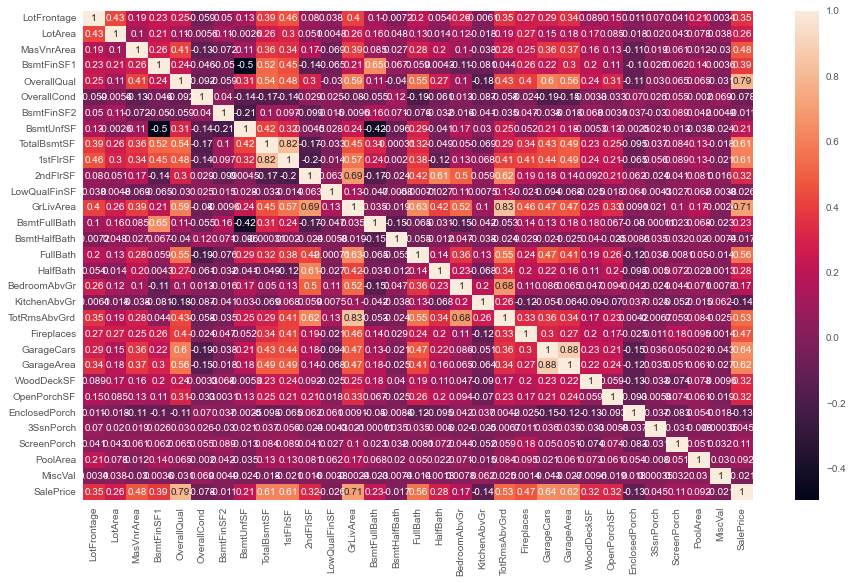

In [30]:
sns.heatmap(data[CUANTITATIVES].corr(), xticklabels=data[CUANTITATIVES].corr().columns, yticklabels=data[CUANTITATIVES].corr().columns, annot=True)


#### Análisis de distribución de variables predictoras

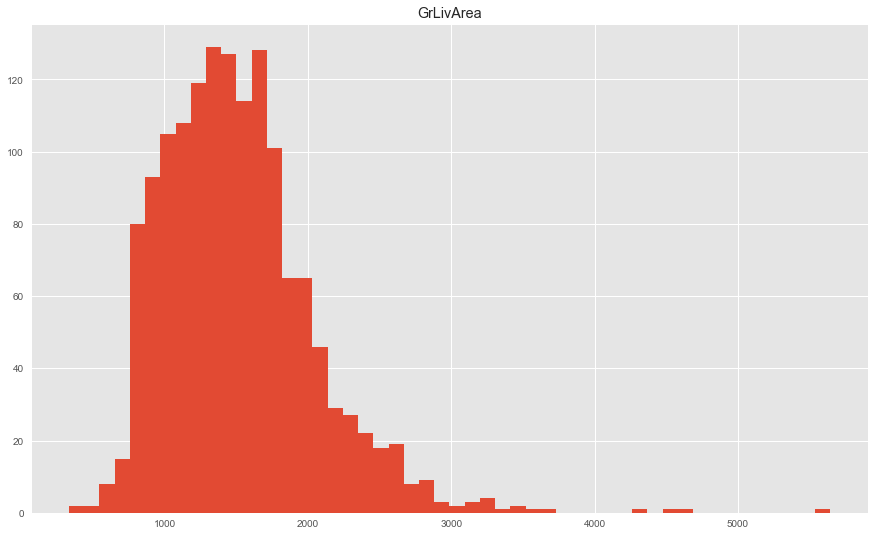

In [31]:
plt.hist(data['GrLivArea'], bins=50)
plt.title("GrLivArea")
plt.show()

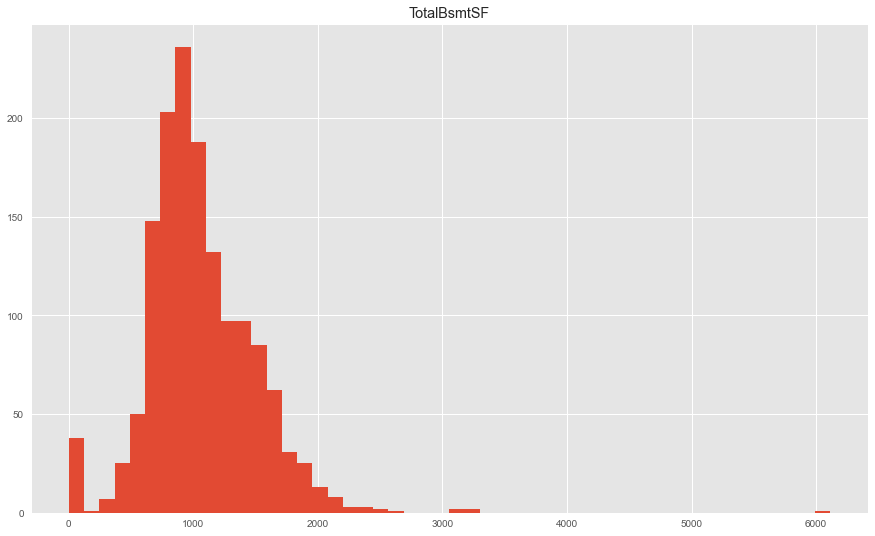

In [32]:

plt.hist(data['TotalBsmtSF'], bins=50)
plt.title("TotalBsmtSF")
plt.show()

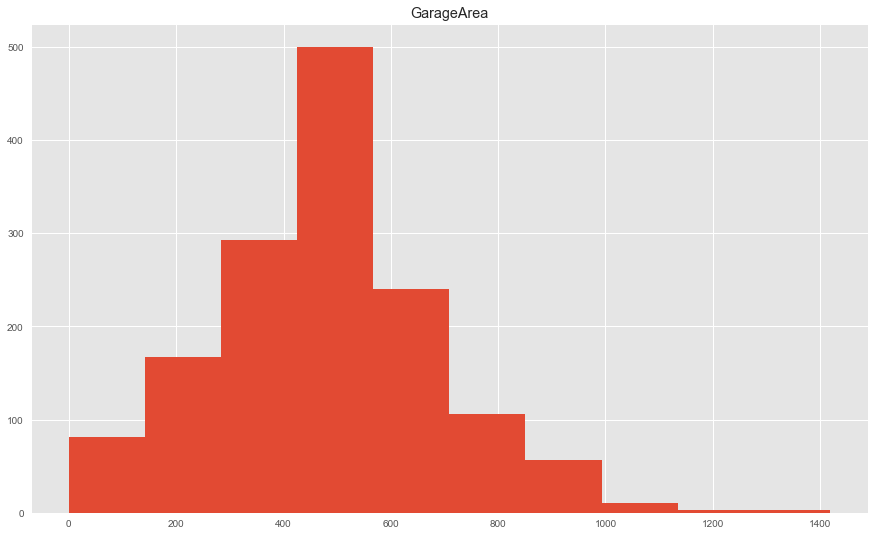

In [33]:

plt.hist(data['GarageArea'])
plt.title("GarageArea")
plt.show()

##### Basado en lo observado tomaremos 3 variables predictoras cuantitativas que tengan una correlación alta con SalePrice y que no estén relacionadas entre sí, estas son: GrLivArea, GarageArea y TotalBsmtSf. Se omite 1stFlrSF ya que está correlacionadas fuertemente con algunas de las variables mencionadas con anterioridad. También se omite DOverallQual a pesar de tener una fuerte correlación ya que es más datos cualitativos representados con un numero entero, además GarageArea se omite de igual manera ya que los datos únicamente varían en 5 valores, lo cual podría ser un indicativo que la variable tiende a ser cualitativa. Además basados en los histogramas hechos a las variables predictoras podemos decir que estos datos tienden seguir distribuciones normales, algo interesante que podemos decir es que TotalBsmtSF se ve ligeramente sesgada a la izquierda y que GrLivArea se ve fuertemente sesgada a la izquierda.

## Elaboración del modelo de regresión lineal, con datos de entrenamiento

In [34]:
y = data['SalePrice'] #La variable respuesta
X = data[['GrLivArea', 'GarageArea', 'TotalBsmtSF']] #El resto de los datos
random.seed(123)

X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)


### Aplicación del modelo al conjunto de prueba

In [35]:

lm = LinearRegression()
lm.fit(X_train, y_train)
p_price_pred = lm.predict(X_test)
p_price_pred

array([208225.6948014 , 398676.56813839, 127300.6494784 , 151684.5636876 ,
       219273.57338721, 228900.89084135, 291479.34589622, 172419.12035525,
       233133.14873417, 161813.51857247, 188093.78314877, 215848.66928124,
       272130.30303688, 129999.40861966, 198266.20983911, 214639.00012355,
       198655.47005027,  94577.93453996, 273274.10890373, 218914.93655745,
       149493.71377235, 169612.7586965 ,  50638.87694421, 381343.62585799,
       102267.18055172, 195435.58291985, 279030.29512504, 315639.50297503,
       200384.39218719, 134965.17126686, 192439.32809178, 265464.15372079,
       140641.39402237, 194975.27776473, 176214.93169952, 210328.89278057,
       190903.43956557, 165888.97650281, 108182.3858135 , 211594.87650535,
       389312.58081186, 154657.09855318, 244389.35595782, 266607.76719166,
       172254.16641482, 192852.57890442, 202664.90822847, 162144.15558029,
       168666.61227993, 232115.05302773, 173253.88466381, 153234.74347964,
       218622.91861247, 1

#### Ecuación de la recta

In [36]:


(lm.coef_,lm.intercept_)


(array([75.635967  , 97.91711699, 62.91735029]), -44859.67834300132)

$$SalePrice = 68.99GrLivArea + 103.51GarageCars + 49.40TotalBsmtSF -24735.77$$

#### Como podemos observar esta ecuacion depende de multiples variables por lo que no se puede graficar ya que sería una gráfica en 4 dimensiones, sin embargo si se puede graficar cada una de las pendientes

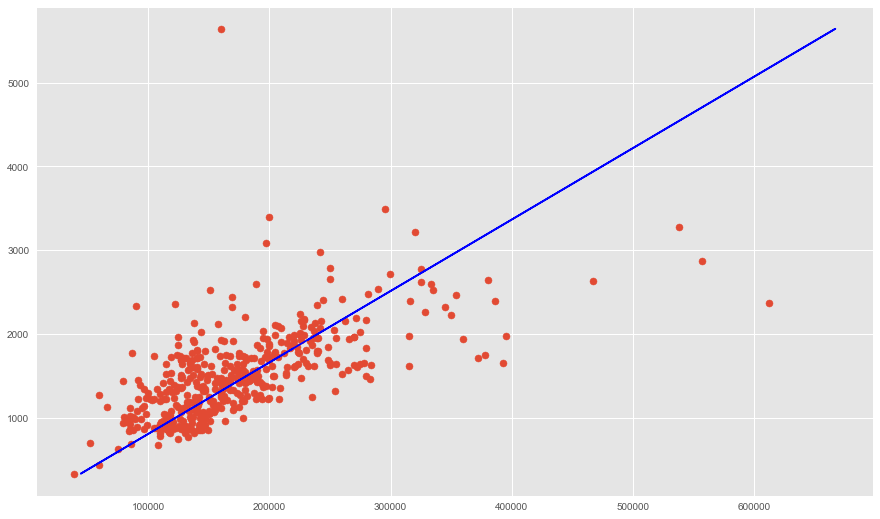

In [37]:
fig = plt.figure()

d = X_test['GrLivArea'].values.reshape(-1,1)

p_length = y_train.values.reshape(-1,1)
p_length_t = y_test.values.reshape(-1,1)
p_width = X_train['GrLivArea'].values.reshape(-1,1)
p_width_t = X_test['GrLivArea'].values.reshape(-1,1)

lm = LinearRegression()
lm.fit(p_width, p_length)
p_length_pred = lm.predict(d)


plt.scatter(p_length_t,p_width_t)
plt.plot(p_length_pred, p_width_t, color="blue")

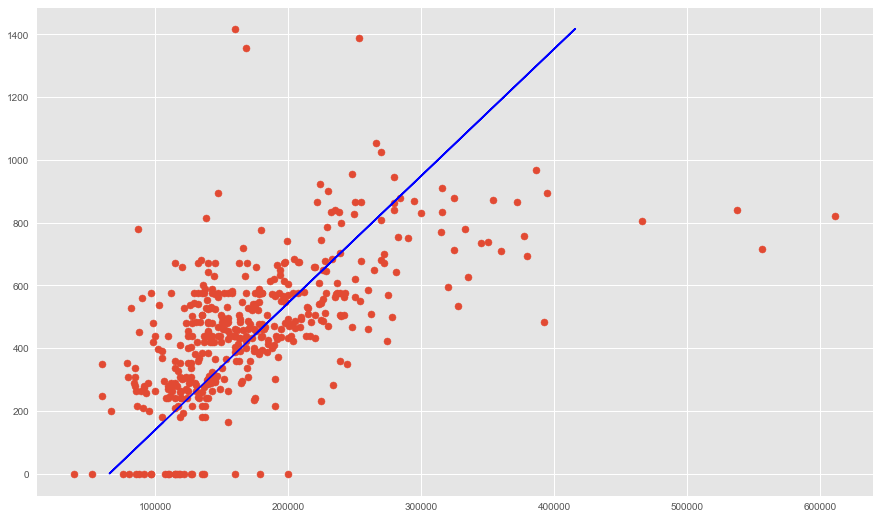

In [38]:
# fig = plt.figure()
# plt.scatter(data['SalePrice'], data['GarageArea'], color='red')


fig = plt.figure()

d = X_test['GarageArea'].values.reshape(-1,1)

p_length = y_train.values.reshape(-1,1)
p_length_t = y_test.values.reshape(-1,1)
p_width = X_train['GarageArea'].values.reshape(-1,1)
p_width_t = X_test['GarageArea'].values.reshape(-1,1)

lm = LinearRegression()
lm.fit(p_width, p_length)
p_length_pred = lm.predict(d)


plt.scatter(p_length_t,p_width_t)
plt.plot(p_length_pred, p_width_t, color="blue")

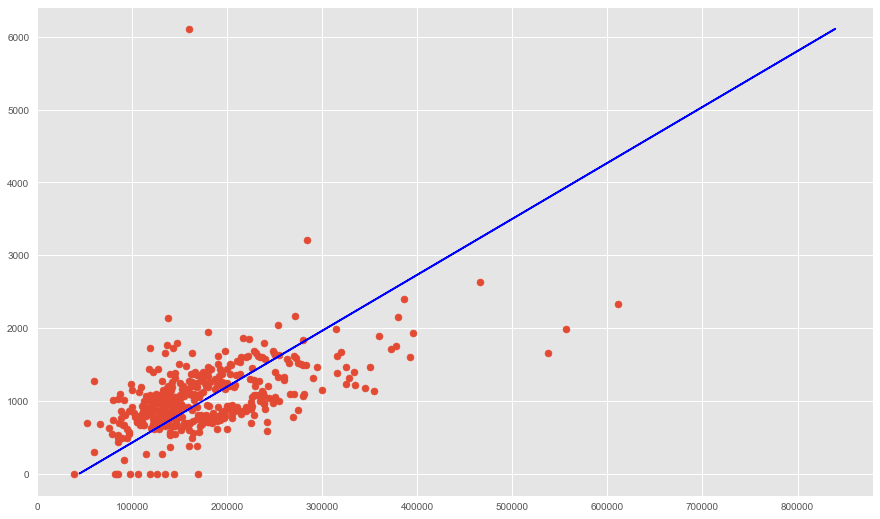

In [39]:
# fig = plt.figure()
# plt.scatter(data['SalePrice'], data['TotalBsmtSF'], color='red')

fig = plt.figure()

d = X_test['TotalBsmtSF'].values.reshape(-1,1)

p_length = y_train.values.reshape(-1,1)
p_length_t = y_test.values.reshape(-1,1)
p_width = X_train['TotalBsmtSF'].values.reshape(-1,1)
p_width_t = X_test['TotalBsmtSF'].values.reshape(-1,1)

lm = LinearRegression()
lm.fit(p_width, p_length)
p_length_pred = lm.predict(d)


plt.scatter(p_length_t,p_width_t)
plt.plot(p_length_pred, p_width_t, color="blue")

#### Como se puede observar en las proyecciones 2d de la regresión lineal de varias variables se ve que las lineas de regresión tienden a seguir el patrón de distribución de los datos de manera lineal, algo que se puede ver es que hay datos que se encuentran bastante lejos de las lineas de regresión, lo cual podría derivar un alto RMSE.

In [40]:
meanSquaredError = mean_squared_error(p_length_t, p_length_pred)
rsqueared = r2_score(p_length_t, p_length_pred)

print("Mean Squared Error: %.2f" % meanSquaredError)
print("R Squared: %.2f" % rsqueared)

Mean Squared Error: 4515411168.79
R Squared: 0.12


#### Como se sospechaba, hay un RMSE alto, lo cual nos indica una alta variabilidad de los datos con la predicción, a pesar de esto se obtuvo un R cuadrado de 0.38, este nos indica a pesar de lo obtenido que sí existe un tipo de correlación entre los datos, a pesar de no ser tan fuerte, lo cual nos dice que el modelo no es erroneo, sino que no es del todo exacto. Esto es justificado ya que las variables predictoras contaban con una correlación entre 0.60 y 0.70, lo cual es una buena correlación, pero no fuerte, pudiendo decir así que este modelo sí logra decir tendencias en los precios de las casas, sin embargo para asegurar esto hay que verificar que el modelo sea confiable con el análisis de residuos.

### Analisis de Residuos

In [41]:
residuales = p_length_t - p_length_pred
len(residuales)

438

Text(0, 0.5, 'Residuales')

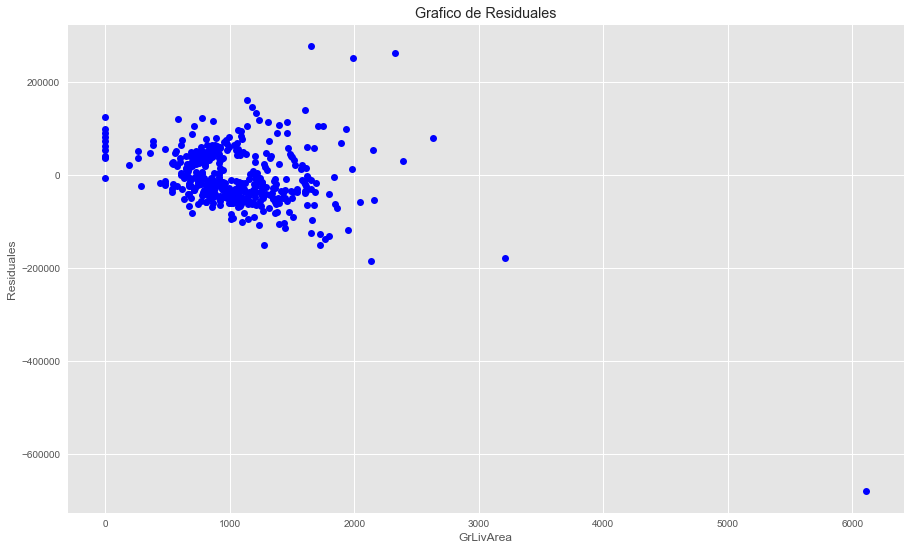

In [42]:
plt.plot(p_width_t, residuales, 'o', color='blue')
plt.title('Grafico de Residuales')
plt.xlabel('GrLivArea')
plt.ylabel('Residuales')

Text(0.5, 1.0, 'Histograma de Residuales')

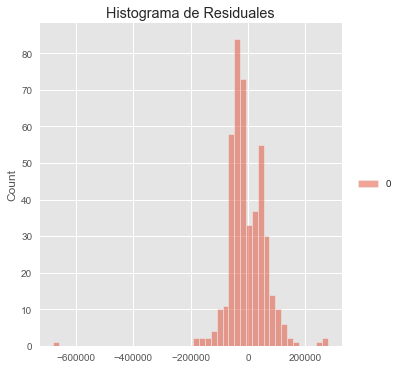

In [43]:
sns.displot(residuales)
plt.title("Histograma de Residuales")

{'whiskers': [<matplotlib.lines.Line2D at 0x24fab677820>,
 'caps': [<matplotlib.lines.Line2D at 0x24fab677f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x24fab677490>],
 'medians': [<matplotlib.lines.Line2D at 0x24fab6846a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24fab684a30>],
 'means': []}

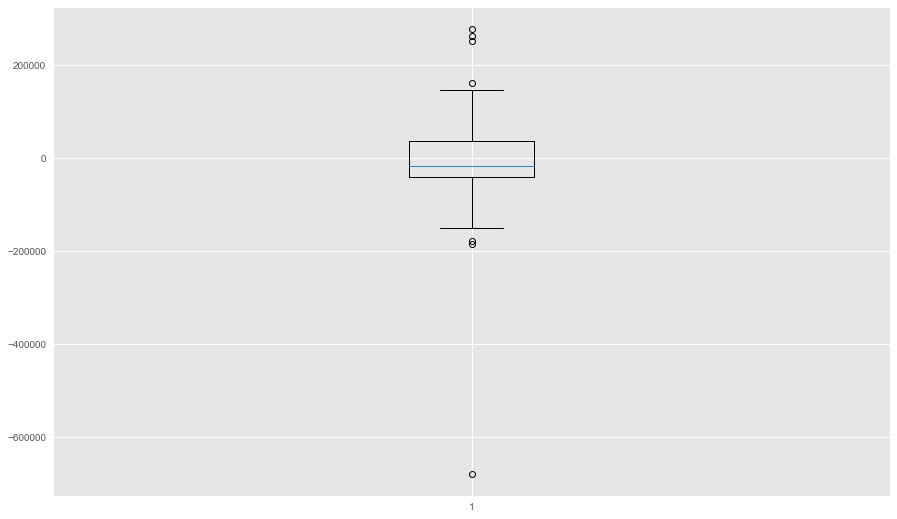

In [44]:
plt.boxplot(residuales)

0.4432246962920625

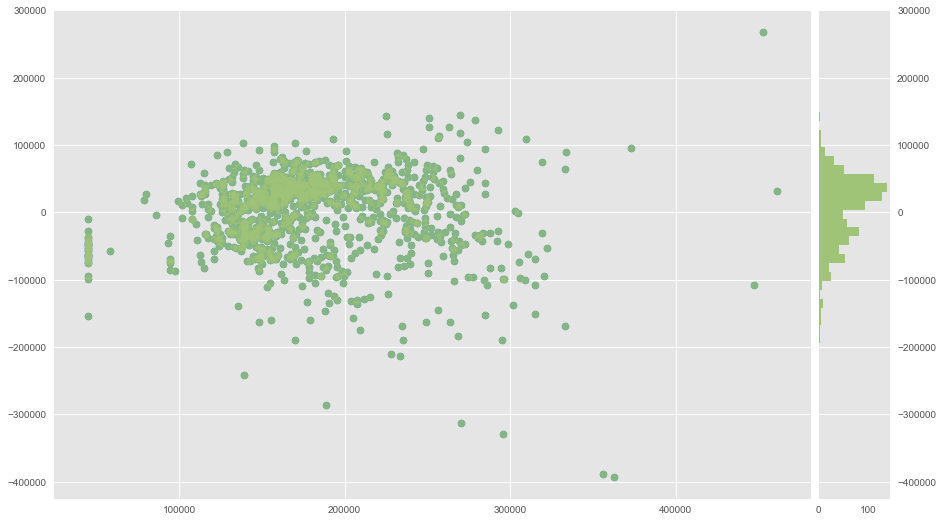

In [45]:
model = Ridge()
visualizer = ResidualsPlot(model, logx=True, logy=True)
visualizer.fit(p_width, p_length)
visualizer.score(p_width, p_length)

In [46]:
test_residuals =normaltest(residuales)
test_residuals

NormaltestResult(statistic=array([252.4098658]), pvalue=array([1.54843882e-55]))

In [47]:
#Basado en la documentación de scipy para aceptar o rechazar hipotesis nula
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

p_theorical = 8.4713e-19

if p_theorical > test_residuals[1][0]:
    print("Hipotesis nula que los datos son normales rechazada")
else:
    print("Hipotesis nula que los datos son normales no puede ser rechazada")

Hipotesis nula que los datos son normales rechazada


#### Basado en lo visto con anterioridad, se observan los residuos o la diferencia entre los valores observados lo que predice. En el gráfico de dispersión se observan datos de manera aleatorizada visiblemente o sin patrones observables, lo cual es un buen indicador de que el modelo de regresión lineal puede ser confiable. Además la grafica del boxplot nos muestra que sí puede llegar a tender a ser una distribución normal y que hay únicamente pocos valores atípicos de un solo lado. Finalmente basados en los gráficos de normalidad y dispersión se tiende a observar que siguen una distribución normal, lo cual nos lo comprueba el test de D’Agostino y Pearson no pudiendo rechazar la hipotesis nula de que son normales los datos, por lo que podemos decir que los residuales siguen una distribución normal, lo cual nos dice que el modelo de predicción es confiable y que no hay tampoco un Overfitting.

## Comparación con el arbol de desición

In [48]:
# y2 = data['SalePrice'] #La variable respuesta
# X2 = data.drop(['SalePrice'], axis=1) #El resto de los datos
# random.seed(123)

# X_train2, X_test2,y_train2, y_test2 = train_test_split(X2, y2,test_size=0.3,train_size=0.7)

In [53]:
arbolRegresion= DecisionTreeRegressor(random_state=42, max_depth=4) #Se limita porque sino queda una monstruosidad xd
arbolRegresion = arbolRegresion.fit(X_train, y_train)
y_pred = arbolRegresion.predict(X_test)

y_pred


array([189188.43055556, 532698.375     , 119443.25766871, 133359.0887574 ,
       277690.89320388, 224512.8372093 , 277690.89320388, 171060.57575758,
       189860.46376812, 133359.0887574 , 189860.46376812, 189188.43055556,
       277690.89320388, 166282.11764706, 189188.43055556, 189188.43055556,
       224512.8372093 , 119443.25766871, 277690.89320388, 224512.8372093 ,
       166282.11764706, 189188.43055556,  91761.31481481, 532698.375     ,
       119443.25766871, 189188.43055556, 277690.89320388, 277690.89320388,
       189860.46376812, 119443.25766871, 189860.46376812, 277690.89320388,
       151926.42      , 171060.57575758, 189860.46376812, 224512.8372093 ,
       189860.46376812, 133359.0887574 , 119443.25766871, 224512.8372093 ,
       397557.33333333, 154104.16666667, 277690.89320388, 224512.8372093 ,
       189860.46376812, 189860.46376812, 189860.46376812, 166282.11764706,
       171060.57575758, 224512.8372093 , 171060.57575758, 151926.42      ,
       189860.46376812, 1